ARIMA yields better results in forecasting short term, whereas LSTM yields better results for long term modeling.


Traditional time series forecasting methods (ARIMA) focus on univariate data with linear relationships and fixed and manually-diagnosed temporal dependence.


Machine learning problems with substantial dataset, its found that the average reduction in error rates obtained by LSTM is between 84–87 percent when compared to ARIMA indicating the superiority of LSTM to ARIMA.


The number of training times, known as “epoch” in deep learning, has no effect on the performance of the trained forecast model and it exhibits a truly random behavior.


LSTMs when compared to simpler NNs like RNN and MLP appear to be more suited at fitting or overfitting the training dataset rather than forecasting it.


Neural networks (LSTMs and other deep learning methods) with huge datasets offer ways to divide it into several smaller batches and train the network in multiple stages. The batch size/each chunk size refers to the total number of training data used. The term iteration is used to represent number of batches needed to complete training a model using the entire dataset.


LSTM is undoubtedly more complicated and difficult to train and in most cases do not exceed the performance of a simple ARIMA model.


Classical methods like ETS and ARIMA out-perform machine learning and deep learning methods for one-step forecasting on univariate datasets.


Classical methods like Theta and ARIMA out-perform machine learning and deep learning methods for multi-step forecasting on univariate datasets.


Classical methods like ARIMA focus on fixed temporal dependence: the relationship between observations at different times, which necessitates analysis and specification of the number of lag observations provided as input.
Machine learning and deep learning methods do not yet deliver on their promise for univariate time series forecasting and there is much research left to be done.


Neural networks add the capability to learn possibly noisy and nonlinear relationships with arbitrarily defined but fixed numbers of inputs. In addition, NNs output multivariate and multi-step forecasting.


Recurrent neural networks (RNNs) add the explicit handling of ordered observations and is able to adapt itself to learn the temporal dependencies from context. With one observation at a time from a sequence, RNN can learn what relevant observations it has seen previously and determine its relevancy in forecasting.


As LSTMs are equipped to to learn long term correlations in a sequence, they can model complex multivariate sequences without the need to specify any time window .

In [9]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'G'

In [5]:
# read the data
temp = pd.read_csv("worcester-19500101-20181230.csv")
temp.head()

,STATION,NAME,DATE,TAVG,TMAX,TMIN,TOBS
0,USW00094746,"WORCESTER, MA US",1/1/1950,NaN,40.0,27.0,NaN
1,USW00094746,"WORCESTER, MA US",1/2/1950,NaN,37.0,28.0,NaN
2,USW00094746,"WORCESTER, MA US",1/3/1950,NaN,51.0,35.0,NaN
3,USW00094746,"WORCESTER, MA US",1/4/1950,NaN,60.0,50.0,NaN
4,USW00094746,"WORCESTER, MA US",1/5/1950,NaN,58.0,41.0,NaN


In [7]:
# set index
temp.index = pd.to_datetime(temp.index)
#drop other columns
temp_min = temp.drop(['STATION','NAME','TAVG','TOBS','TMAX'], axis = 1)
temp_min.set_index('DATE', inplace=True)
temp_min.index = pd.to_datetime(temp_min.index)
# resample as series (by the mean temp of every month)
temp_min = temp_min['TMIN'].resample('MS').mean()
temp_min.head(5)

DATE
1950-01-01    22.806452
1950-02-01    14.428571
1950-03-01    18.225806
1950-04-01    33.533333
1950-05-01    43.419355
Freq: MS, Name: TMIN, dtype: float64

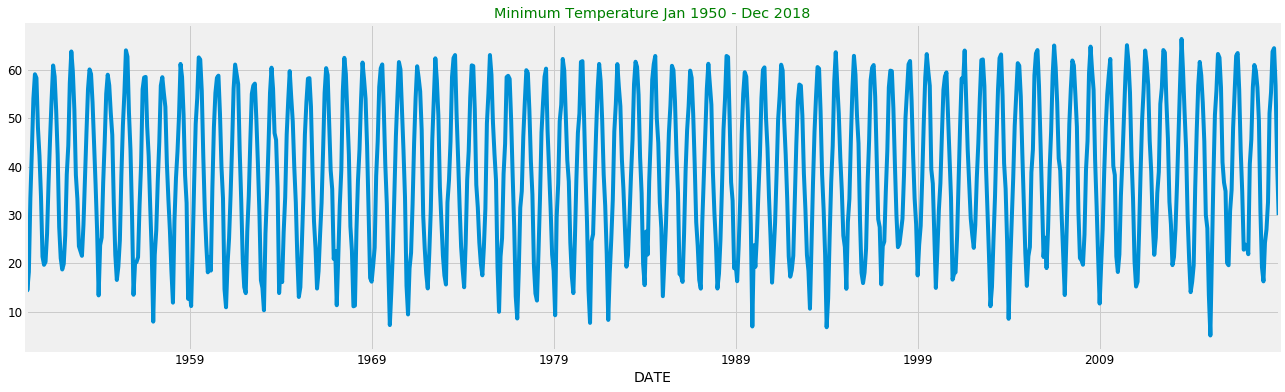

In [8]:
# plot the time series
temp_min.plot(figsize=(20, 6))
plt.title('Minimum Temperature Jan 1950 - Dec 2018')
plt.show()

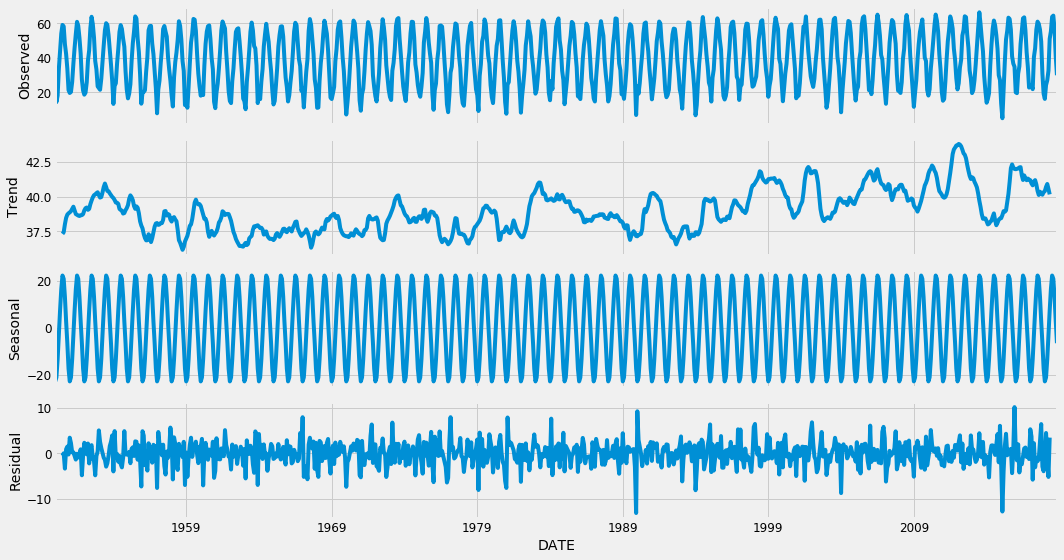

In [14]:
# check the seasonality/trend
rcParams['figure.figsize'] = 15,8 
decomposition = sm.tsa.seasonal_decompose(temp_min, model='additive')
fig = decomposition.plot()
plt.show()

In [15]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [17]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(temp_min,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8526.080857974779
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7453.966763521363
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4652.680324202587
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4129.479325455045
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4658.6805159785035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4182.307042448781
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4411.59858908288
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4131.459312105472
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7524.330535935332
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6674.894306031021
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4631.754769641215
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4105.339236291289
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4644.230887727688
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4156.551548801682
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4402.6239974493465
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4107.333124058183
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:5968.74577581093
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5437.726557174378
ARIMA(0, 1

In [27]:
# choose the best parameters
model = sm.tsa.statespace.SARIMAX(temp_min,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1297      0.031      4.153      0.000       0.069       0.191
ma.L1         -1.0323      0.011    -91.570      0.000      -1.054      -1.010
ma.S.L12      -1.0000     43.433     -0.023      0.982     -86.126      84.126
sigma2         8.3867    364.328      0.023      0.982    -705.682     722.456


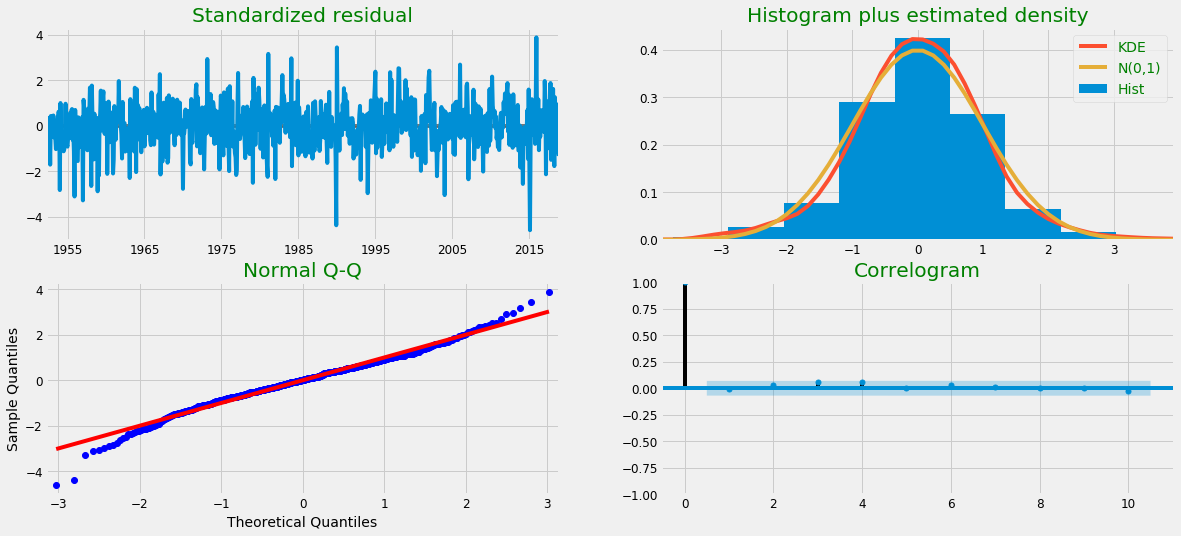

In [28]:
# diagnostics plot
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [32]:
# split train and test data
train = temp_min.loc['1950-01-01':'2010-12-01']
test = temp_min.loc['2011-01-01':]
test.head()

DATE
2011-01-01    15.225806
2011-02-01    16.214286
2011-03-01    26.451613
2011-04-01    38.966667
2011-05-01    49.677419
Freq: MS, Name: TMIN, dtype: float64

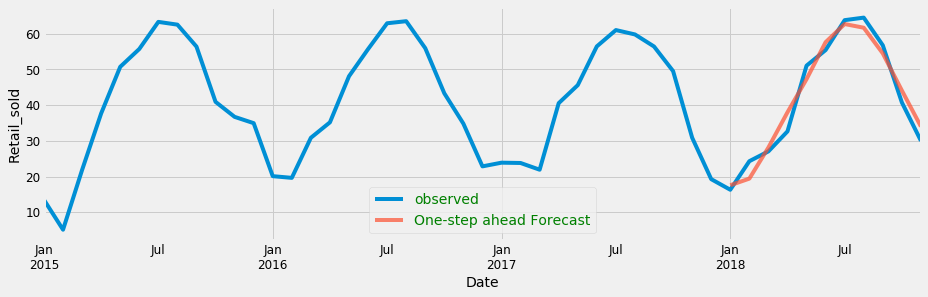

In [42]:
# visualize the result between the prediction and the real value
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = temp_min['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.set_xlabel('Date')
ax.set_ylabel('Retail_sold')
plt.legend()
plt.show()

In [43]:
# find the MSE and RMSE
y_forecasted = pred.predicted_mean
y_truth = temp_min['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error is 10.51
The Root Mean Squared Error is 3.24
